# Load Data

In [1]:
import pandas as pd

df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [2]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df_hour["datetime"] = pd.to_datetime(df_hour["dteday"]) + pd.to_timedelta(df_hour["hr"], unit="h")
df_hour.set_index("datetime", inplace=True)

In [4]:
df_hour['yr']

datetime
2011-01-01 00:00:00    0
2011-01-01 01:00:00    0
2011-01-01 02:00:00    0
2011-01-01 03:00:00    0
2011-01-01 04:00:00    0
                      ..
2012-12-31 19:00:00    1
2012-12-31 20:00:00    1
2012-12-31 21:00:00    1
2012-12-31 22:00:00    1
2012-12-31 23:00:00    1
Name: yr, Length: 17379, dtype: int64

In [6]:
from scipy.stats import pearsonr

# Calculate correlation and p-value
r, p_value = pearsonr(df_hour['casual'], df_hour['cnt'])

# Set your significance level
alpha = 0.05

# Print a clear summary
print(f"Pearson correlation coefficient: {r:.3f}")
print(f"P-value: {p_value:.3e}")  # scientific notation if very small

if p_value < alpha:
    print(f"The correlation is statistically significant at alpha = {alpha}.")
else:
    print(f"The correlation is NOT statistically significant at alpha = {alpha}.")


Pearson correlation coefficient: 0.695
P-value: 0.000e+00
The correlation is statistically significant at alpha = 0.05.


In [7]:
df_hour.index.is_monotonic_increasing


True

In [8]:
df_hour.index.duplicated().sum()


np.int64(0)

In [9]:
df_hour.index.is_unique


True

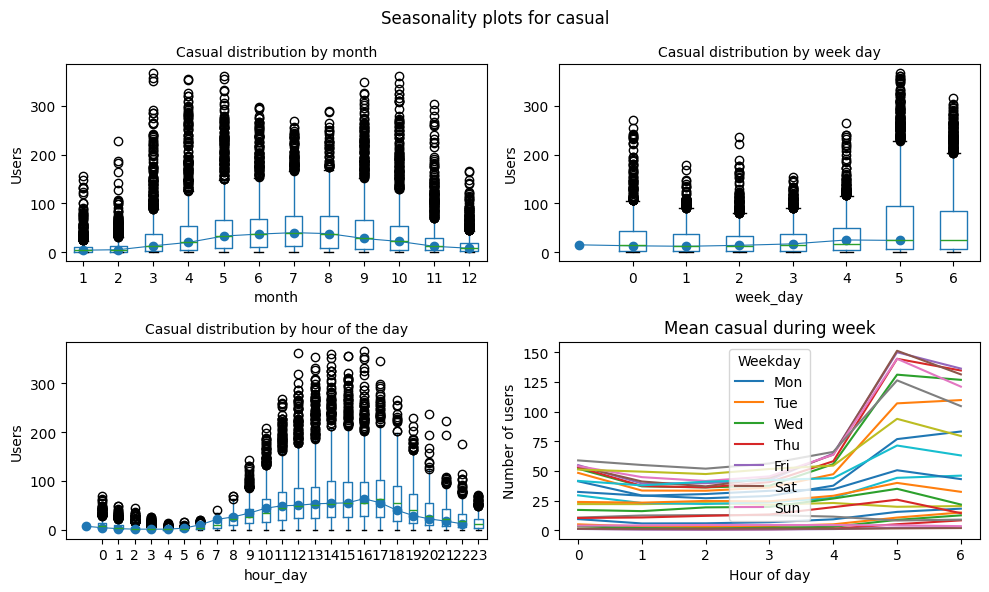

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume df is your hourly bike-sharing dataframe with datetime index
# and columns 'casual', 'registered', 'cnt'

data = df_hour.copy()
data['month'] = data.index.month
data['week_day'] = data.index.dayofweek  # 0=Mon
data['hour_day'] = data.index.hour       # 0-23

# We'll do plots for 'casual' first (repeat for 'registered')
target = 'casual'

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.ravel()

# 1️⃣ Users distribution by month
data.boxplot(column=target, by='month', ax=axs[0])
data.groupby('month')[target].median().plot(style='o-', linewidth=0.8, ax=axs[0])
axs[0].set_ylabel('Users')
axs[0].set_title(f'{target.capitalize()} distribution by month', fontsize=10)

# 2️⃣ Users distribution by weekday
data.boxplot(column=target, by='week_day', ax=axs[1])
data.groupby('week_day')[target].median().plot(style='o-', linewidth=0.8, ax=axs[1])
axs[1].set_ylabel('Users')
axs[1].set_title(f'{target.capitalize()} distribution by week day', fontsize=10)

# 3️⃣ Users distribution by hour of the day
data.boxplot(column=target, by='hour_day', ax=axs[2])
data.groupby('hour_day')[target].median().plot(style='o-', linewidth=0.8, ax=axs[2])
axs[2].set_ylabel('Users')
axs[2].set_title(f'{target.capitalize()} distribution by hour of the day', fontsize=10)

# 4️⃣ Mean users by week day and hour
mean_day_hour = data.groupby(["week_day", "hour_day"])[target].mean().unstack()
mean_day_hour.plot(ax=axs[3])
axs[3].set_title(f"Mean {target} during week")
axs[3].set_xlabel("Hour of day")
axs[3].set_ylabel("Number of users")
axs[3].legend(title='Weekday', labels=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

fig.suptitle(f"Seasonality plots for {target}", fontsize=12)
fig.tight_layout()
plt.show()


array([[<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

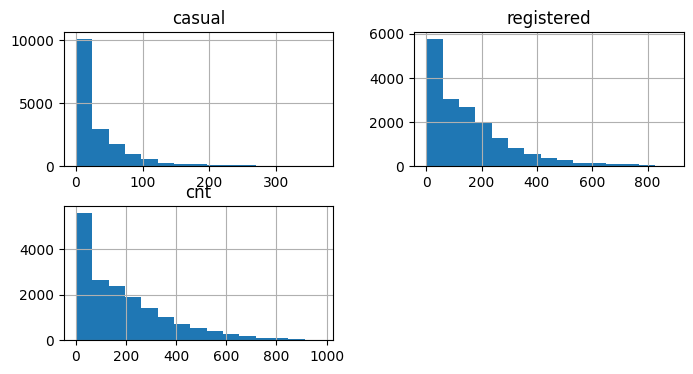

In [11]:
df_hour[["casual","registered","cnt"]].hist(bins=15, figsize=(8,4))


In [12]:
# df[["casual","registered"]].skew()
df_hour[["casual","registered"]].skew()

casual        2.499237
registered    1.557904
dtype: float64

In [13]:
(df_hour["casual"]==0).sum()


np.int64(1581)

In [ ]:
numeric_cols = df_hour.select_dtypes(include='number')
numeric_cols.corr()["casual"].sort_values(ascending=False)


casual        1.000000
cnt           0.694564
registered    0.506618
temp          0.459616
atemp         0.454080
hr            0.301202
instant       0.158295
yr            0.142779
season        0.120206
windspeed     0.090287
mnth          0.068457
weekday       0.032721
holiday       0.031564
weathersit   -0.152628
workingday   -0.300942
hum          -0.347028
Name: casual, dtype: float64

In [16]:
numeric_cols.corr()["registered"].sort_values(ascending=False)


registered    1.000000
cnt           0.972151
casual        0.506618
hr            0.374141
temp          0.335361
atemp         0.332559
instant       0.282046
yr            0.253684
season        0.174226
workingday    0.134326
mnth          0.122273
windspeed     0.082321
weekday       0.021578
holiday      -0.047345
weathersit   -0.120966
hum          -0.273933
Name: registered, dtype: float64

# Lag

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

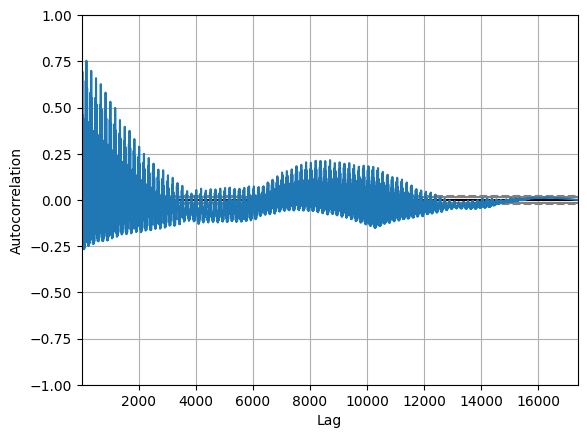

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_hour["casual"])


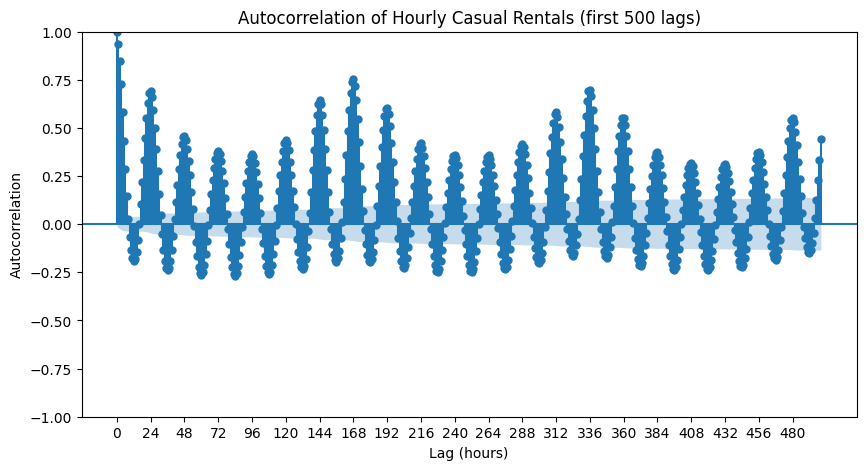

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation for first 500 lags
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_hour["casual"], lags=500, ax=ax)

# Set x-axis ticks at every 24 hours
ticks = np.arange(0, 501, 24)  # from 0 to 500, step 24
ax.set_xticks(ticks)

# Labels
ax.set_xlabel("Lag (hours)")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation of Hourly Casual Rentals (first 500 lags)")

plt.show()


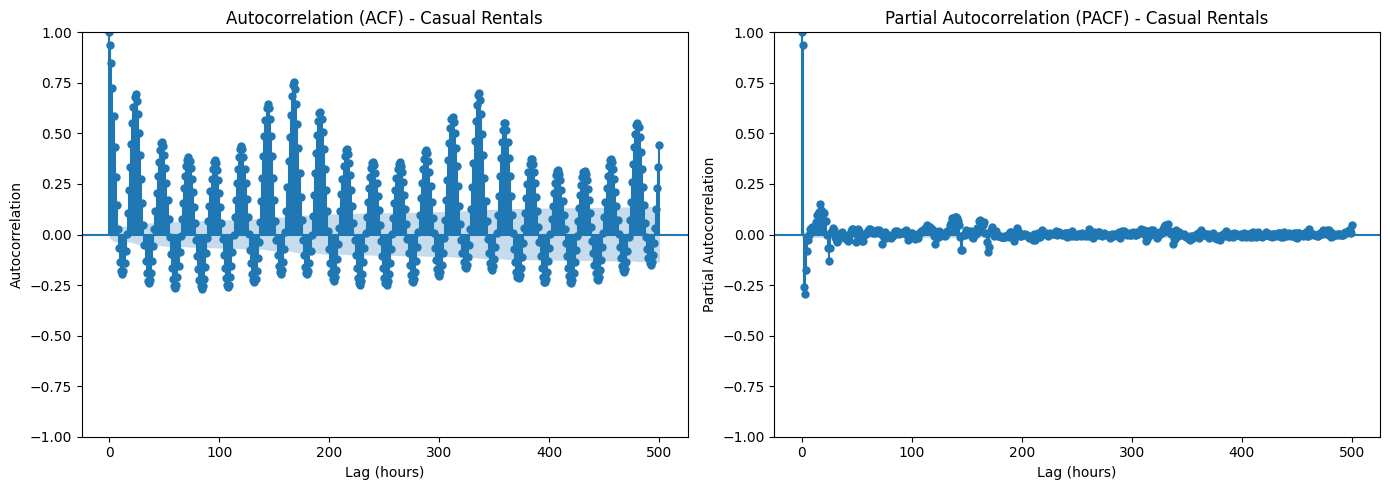

In [23]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Autocorrelation Function (ACF)
plot_acf(df_hour["casual"], lags=500, ax=axes[0])
axes[0].set_title("Autocorrelation (ACF) - Casual Rentals")
axes[0].set_xlabel("Lag (hours)")
axes[0].set_ylabel("Autocorrelation")

# Partial Autocorrelation Function (PACF)
plot_pacf(df_hour["casual"], lags=500, ax=axes[1], method="ywm")
axes[1].set_title("Partial Autocorrelation (PACF) - Casual Rentals")
axes[1].set_xlabel("Lag (hours)")
axes[1].set_ylabel("Partial Autocorrelation")

plt.tight_layout()
plt.show()


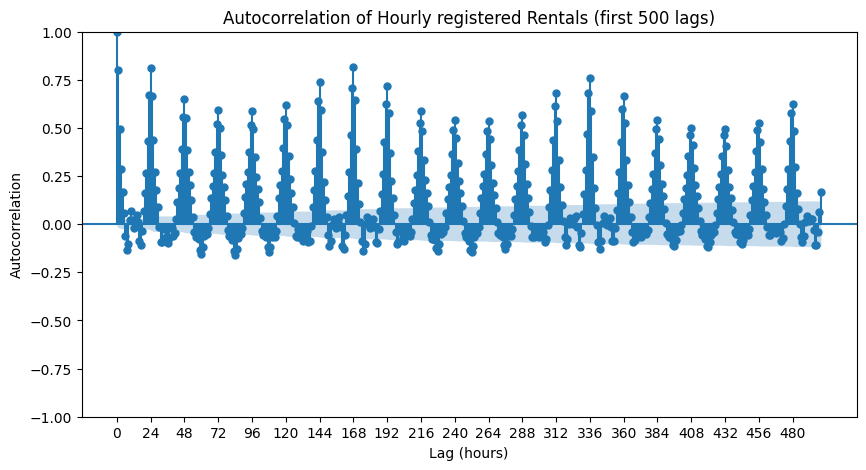

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation for first 500 lags
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_hour["registered"], lags=500, ax=ax)

# Set x-axis ticks at every 24 hours
ticks = np.arange(0, 501, 24)  # from 0 to 500, step 24
ax.set_xticks(ticks)

# Labels
ax.set_xlabel("Lag (hours)")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation of Hourly registered Rentals (first 500 lags)")

plt.show()


# Feature Engineering

In [29]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Example: test 'casual' series
series = df_hour['casual']

adf_result = adfuller(series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

if adf_result[1] < 0.05:
    print("Series is likely stationary.")
else:
    print("Series is likely non-stationary.")


ADF Statistic: -13.667510462615013
p-value: 1.4810353782022105e-25
Critical Values: {'1%': np.float64(-3.430727308679485), '5%': np.float64(-2.861706755762842), '10%': np.float64(-2.566858759781439)}
Series is likely stationary.


In [30]:
# Example: 2h, 4h, 8h, 24h lags
lag_hours = [2, 4, 8, 24]

for lag in lag_hours:
    df_hour[f'casual_lag{lag}'] = df_hour['casual'].shift(lag)
    df_hour[f'reg_lag{lag}'] = df_hour['registered'].shift(lag)


In [31]:
# rolling mean over past 3h and 24h
from curses import window

df_hour['casual_roll3'] = df_hour['casual'].shift(1).rolling(window=3).mean()
df_hour['registered_roll3'] = df_hour['registered'].shift(1).rolling(window=3).mean()

In [32]:
df_hour['casual_roll24'] = df_hour['casual'].shift(1).rolling(window=24).mean()
df_hour['registered_roll24'] = df_hour['registered'].shift(1).rolling(window=24).mean()


In [33]:
# --- 4️⃣ Cyclical time features ---
df_hour['hr_sin'] = np.sin(2 * np.pi * df_hour['hr']/24)
df_hour['hr_cos'] = np.cos(2 * np.pi * df_hour['hr']/24)
df_hour['month_sin'] = np.sin(2 * np.pi * df_hour['mnth']/12)
df_hour['month_cos'] = np.cos(2 * np.pi * df_hour['mnth']/12)
df_hour['weekday_sin'] = np.sin(2 * np.pi * df_hour['weekday']/7)
df_hour['weekday_cos'] = np.cos(2 * np.pi * df_hour['weekday']/7)

In [34]:
# --- 5️⃣ Other features ---
feature_cols = [
    'temp', 'atemp', 'hum', 'windspeed', 'holiday', 'workingday',
    'hr_sin', 'hr_cos', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos',
    'casual_lag2','casual_lag4','casual_lag8','casual_lag24','casual_roll3','casual_roll24',
    'reg_lag2','reg_lag4','reg_lag8','reg_lag24','registered_roll3','registered_roll24'
]

# Drop rows with NaN (due to lags/rolling)
df_model = df_hour.dropna(subset=feature_cols + ['casual','registered'])


In [35]:
# --- 6️⃣ Separate targets ---
X = df_model[feature_cols]
y_casual = df_model['casual']
y_registered = df_model['registered']

In [36]:
# --- 7️⃣ Train/test split (80/20) ---
import numpy as np
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_casual, test_size=0.2, shuffle=False)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_registered, test_size=0.2, shuffle=False)


In [37]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Create numeric features from the date
df_hour['day'] = df_hour['dteday'].dt.day
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['weekday'] = df_hour['dteday'].dt.weekday
df_hour['hour'] = df_hour['hr']  # hr is already in dataset

In [38]:
df_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'casual_lag2', 'reg_lag2', 'casual_lag4',
       'reg_lag4', 'casual_lag8', 'reg_lag8', 'casual_lag24', 'reg_lag24',
       'casual_roll3', 'registered_roll3', 'casual_roll24',
       'registered_roll24', 'hr_sin', 'hr_cos', 'month_sin', 'month_cos',
       'weekday_sin', 'weekday_cos', 'day', 'month', 'year', 'hour'],
      dtype='object')

In [39]:
# --- 5️⃣ Other features ---
feature_cols = [
    'temp', 'atemp', 'hum', 'windspeed', 'holiday', 'workingday',
    'hr_sin', 'hr_cos', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos',
    'casual_lag2','casual_lag4','casual_lag8','casual_lag24','casual_roll3','casual_roll24',
    'reg_lag2','reg_lag4','reg_lag8','reg_lag24','registered_roll3','registered_roll24'
]

# Drop rows with NaN (due to lags/rolling)
df_model = df_hour.dropna(subset=feature_cols + ['casual','registered'])


In [40]:
# Example setup
target = 'casual'  # or 'registered'

features = feature_cols
# features = ['instant',  'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
#        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']  # replace with your features

# Joint Multivariate VAR

In [41]:
import numpy as np
import pandas as pd

# statsmodels pieces we'll use
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen, select_coint_rank, VECM

# metrics & plotting
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [42]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hr_sin,hr_cos,month_sin,month_cos,weekday_sin,weekday_cos,day,month,year,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,0,0,5,0,1,...,0.000000,1.000000,0.5,0.866025,-0.781831,0.62349,1,1,2011,0
2011-01-01 01:00:00,2,2011-01-01,1,0,1,1,0,5,0,1,...,0.258819,0.965926,0.5,0.866025,-0.781831,0.62349,1,1,2011,1
2011-01-01 02:00:00,3,2011-01-01,1,0,1,2,0,5,0,1,...,0.500000,0.866025,0.5,0.866025,-0.781831,0.62349,1,1,2011,2
2011-01-01 03:00:00,4,2011-01-01,1,0,1,3,0,5,0,1,...,0.707107,0.707107,0.5,0.866025,-0.781831,0.62349,1,1,2011,3
2011-01-01 04:00:00,5,2011-01-01,1,0,1,4,0,5,0,1,...,0.866025,0.500000,0.5,0.866025,-0.781831,0.62349,1,1,2011,4


In [43]:
#df = df.asfreq('H')  # pick the right freq for your data - datetime index is already hourly


df_hour = df_hour.sort_index()
df_hour = df_hour.asfreq('H')  # pick the right freq for your data

endog = df_hour[['registered', 'casual']].copy()
exog  = df_hour[[ 'temp', 'atemp', 'hum', 'windspeed', 'holiday', 'workingday',
    'hr_sin', 'hr_cos', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos']].copy()   # if you have exog

C:\Users\gvikr\AppData\Local\Temp\ipykernel_29732\1877755855.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour = df_hour.asfreq('H')  # pick the right freq for your data


In [44]:
# simple imputation example (choose method carefully)
endog = endog.fillna(method='ffill').fillna(method='bfill')
exog  = exog.fillna(method='ffill').fillna(method='bfill')

C:\Users\gvikr\AppData\Local\Temp\ipykernel_29732\66764303.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='ffill').fillna(method='bfill')
C:\Users\gvikr\AppData\Local\Temp\ipykernel_29732\66764303.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog  = exog.fillna(method='ffill').fillna(method='bfill')


In [45]:
def adf_test(series, name=None, sig=0.05):
    res = adfuller(series.dropna(), autolag='BIC') # AIC, others whats the best?
    pval = res[1]
    print(f"{name or 'series'} ADF p-value = {pval:.4f}  -> {'stationary' if pval < sig else 'non-stationary'}")
    return pval

for col in endog.columns:
    adf_test(endog[col], col)


registered ADF p-value = 0.0000  -> stationary
casual ADF p-value = 0.0000  -> stationary


Use if non stationary and conintegrated

from statsmodels.tsa.stattools import coint

score, pval, _ = coint(endog['registered'], endog['casual'])
print("Engle-Granger p-value:", pval)


In [46]:
# example: endog is a DataFrame of endogenous variables
model = VAR(endog)         # or VAR(endog, exog=exog) if you want exog included (contiguous)
lag_res = model.select_order(maxlags=24)
print(lag_res.summary())               # shows AIC/BIC/HQIC/FPE over candidate lags


p = lag_res.selected_orders['aic']     # or 'bic' depending on your preference
print("Chosen lag (AIC):", p)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        17.53       17.53   4.106e+07       17.53
1        14.55       14.55   2.086e+06       14.55
2        14.28       14.28   1.589e+06       14.28
3        14.15       14.16   1.401e+06       14.15
4        14.11       14.12   1.347e+06       14.12
5        14.10       14.11   1.326e+06       14.10
6        14.09       14.10   1.317e+06       14.09
7        14.08       14.09   1.304e+06       14.09
8        14.03       14.04   1.238e+06       14.03
9        13.97       13.99   1.168e+06       13.98
10       13.93       13.95   1.126e+06       13.94
11       13.92       13.95   1.115e+06       13.93
12       13.91       13.93   1.102e+06       13.92
13       13.90       13.92   1.088e+06       13.91
14       13.89       13.91   1.076e+06       13.90
15       13.85       13.88   1.033e+06       13.86
16       13.82       13.85   1.

In [47]:
res_var = model.fit(p)
print(res_var.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Nov, 2025
Time:                     10:17:40
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.3787
Nobs:                     17520.0    HQIC:                   13.3495
Log likelihood:          -166438.    FPE:                    618605.
AIC:                      13.3352    Det(Omega_mle):         615159.
--------------------------------------------------------------------
Results for equation registered
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  7.295752         1.112822            6.556           0.000
L1.registered          0.900207         0.007614          118.233           0.000
L1.casual              0.298328         0.030910   

In [48]:
print("Stable?", res_var.is_stable())
print(res_var.test_normality())


Stable? True
<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: reject at 5% significance level. Test statistic: 62781.546, critical value: 9.488>, p-value: 0.000>


In [49]:
res_var.test_whiteness(nlags=48).summary()


Test statistic,Critical value,p-value,df
5288.,119.9,0.000,96


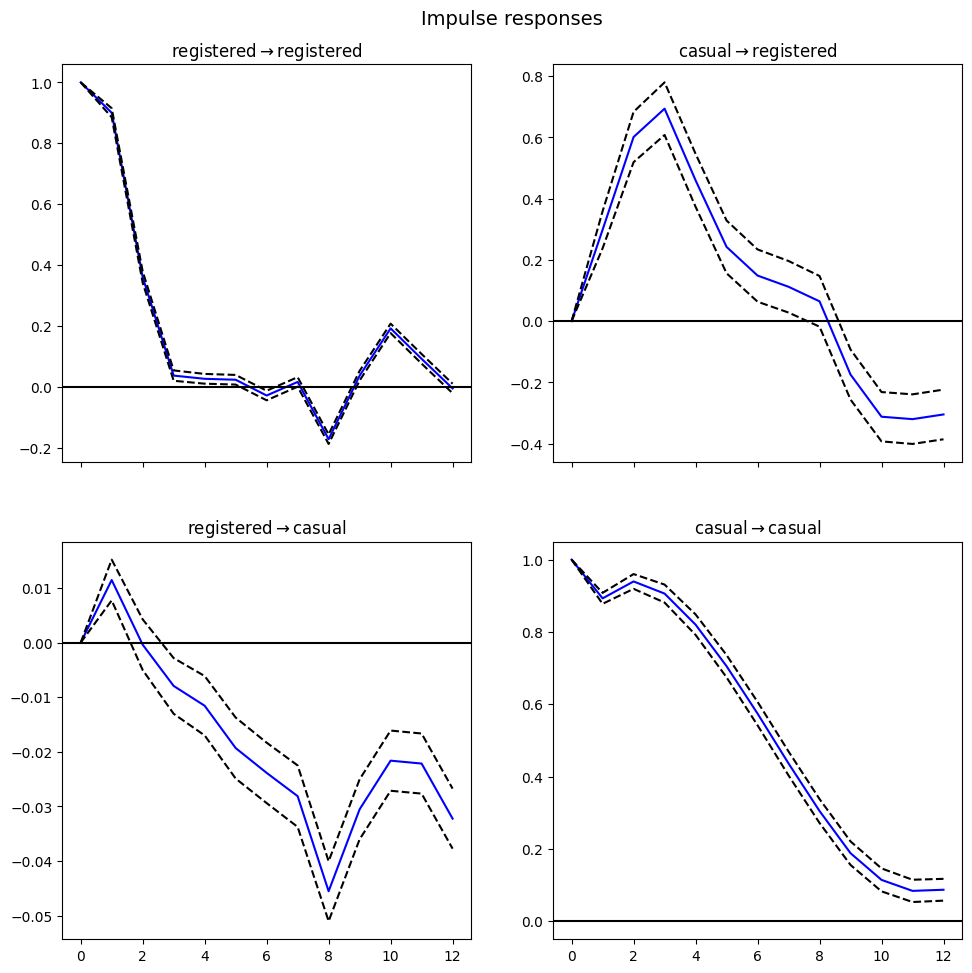

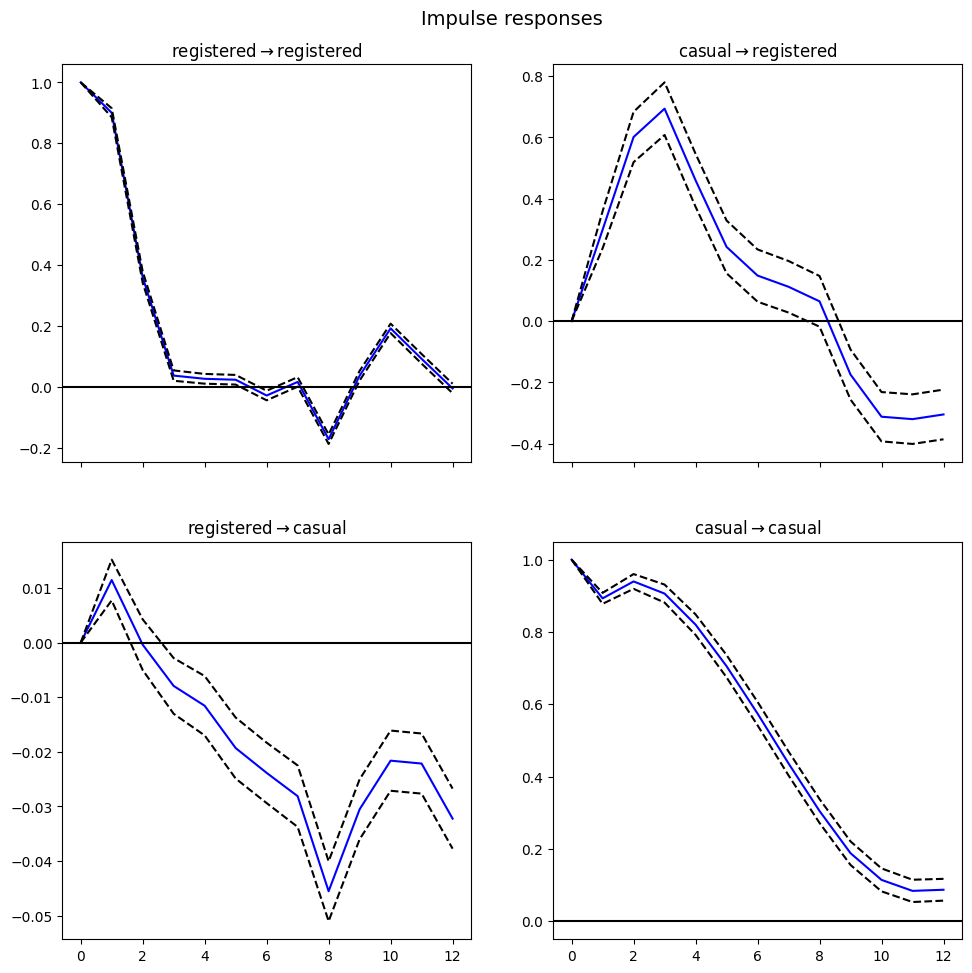

In [50]:
irf = res_var.irf(12)
irf.plot(orth=False)   # orthogonalized or not, and use irf.errband or Monte Carlo bands

# VARX

In [51]:
model_x = VAR(endog, exog=exog)   # exog must align row-wise

lag_res_x = model_x.select_order(maxlags=24)
print(lag_res_x.summary())               # shows AIC/BIC/HQIC/FPE over candidate lags


p = lag_res_x.selected_orders['aic']     # or 'bic' depending on your preference
res_varx = model_x.fit(p)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        16.50       16.51   1.469e+07       16.51
1        14.29       14.30   1.609e+06       14.30
2        14.04       14.05   1.246e+06       14.04
3        13.96       13.98   1.159e+06       13.97
4        13.93       13.95   1.124e+06       13.94
5        13.91       13.93   1.100e+06       13.92
6        13.90       13.92   1.087e+06       13.91
7        13.90       13.92   1.086e+06       13.91
8        13.85       13.88   1.035e+06       13.86
9        13.77       13.80   9.559e+05       13.78
10       13.76       13.79   9.427e+05       13.77
11       13.74       13.77   9.244e+05       13.75
12       13.71       13.74   8.963e+05       13.72
13       13.67       13.71   8.654e+05       13.68
14       13.65       13.68   8.440e+05       13.66
15       13.63       13.67   8.326e+05       13.64
16       13.62       13.66   8.

In [52]:
print("Stable?", res_varx.is_stable())
print(res_varx.test_normality())


Stable? True
<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: reject at 5% significance level. Test statistic: 58387.409, critical value: 9.488>, p-value: 0.000>


In [53]:
res_varx.test_whiteness(nlags=48).summary()


Test statistic,Critical value,p-value,df
4894.,119.9,0.000,96


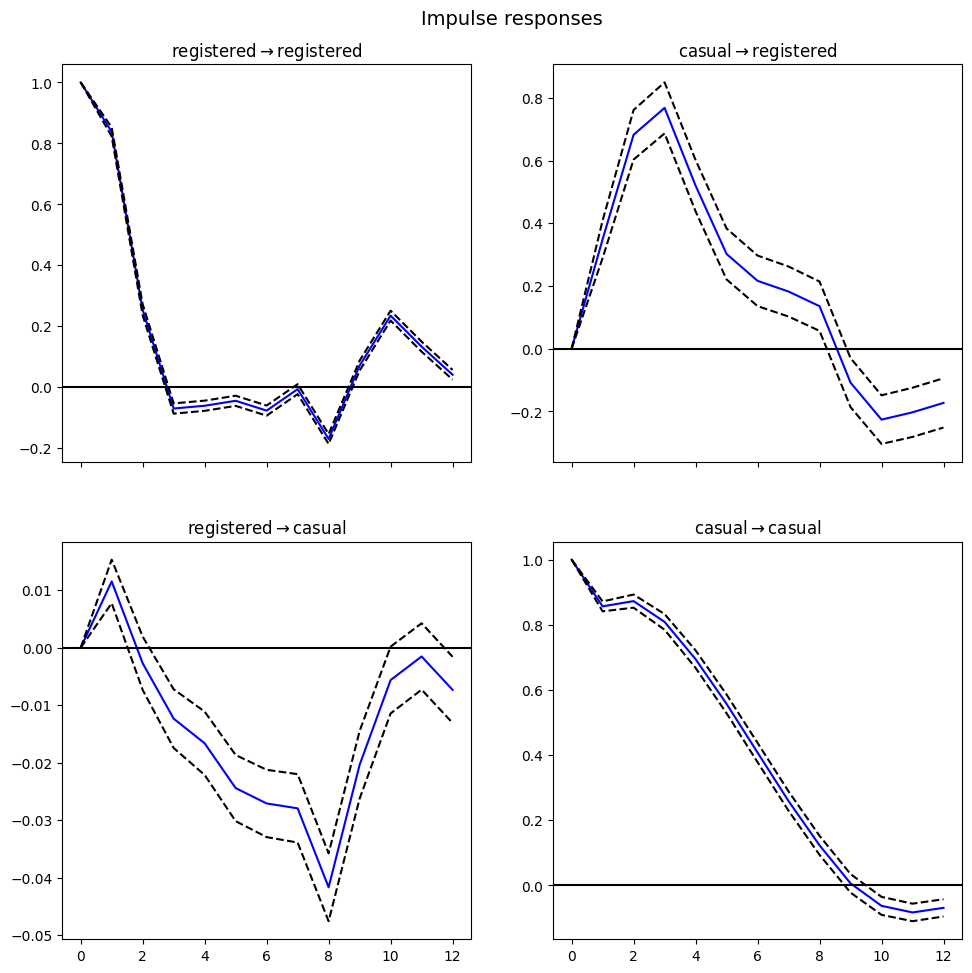

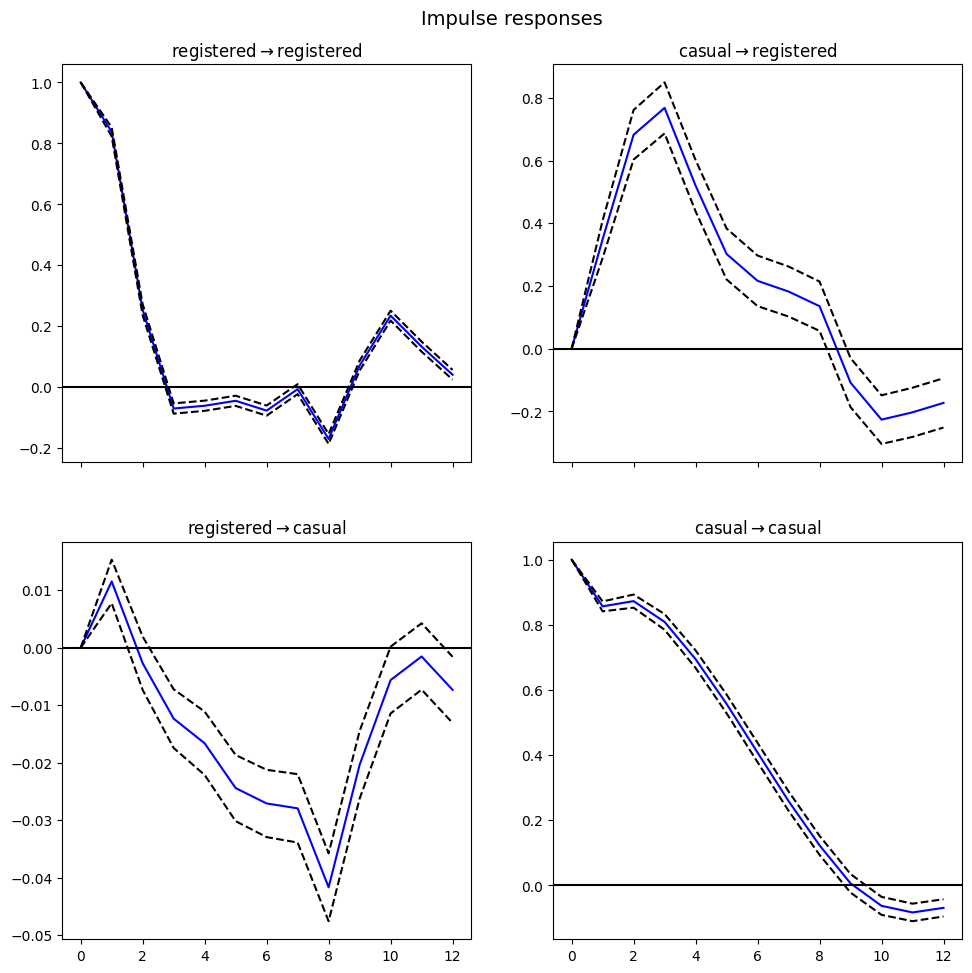

In [54]:
irf = res_varx.irf(12)
irf.plot(orth=False)   # orthogonalized or not, and use irf.errband or Monte Carlo bands


In [55]:
exog

,temp,atemp,hum,windspeed,holiday,workingday,hr_sin,hr_cos,month_sin,month_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,0.24,0.2879,0.81,0.0000,0.0,0.0,0.000000,1.000000,5.000000e-01,0.866025,-0.781831,0.62349
2011-01-01 01:00:00,0.22,0.2727,0.80,0.0000,0.0,0.0,0.258819,0.965926,5.000000e-01,0.866025,-0.781831,0.62349
2011-01-01 02:00:00,0.22,0.2727,0.80,0.0000,0.0,0.0,0.500000,0.866025,5.000000e-01,0.866025,-0.781831,0.62349
2011-01-01 03:00:00,0.24,0.2879,0.75,0.0000,0.0,0.0,0.707107,0.707107,5.000000e-01,0.866025,-0.781831,0.62349
2011-01-01 04:00:00,0.24,0.2879,0.75,0.0000,0.0,0.0,0.866025,0.500000,5.000000e-01,0.866025,-0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.26,0.2576,0.60,0.1642,0.0,1.0,-0.965926,0.258819,-2.449294e-16,1.000000,0.781831,0.62349
2012-12-31 20:00:00,0.26,0.2576,0.60,0.1642,0.0,1.0,-0.866025,0.500000,-2.449294e-16,1.000000,0.781831,0.62349
2012-12-31 21:00:00,0.26,0.2576,0.60,0.1642,0.0,1.0,-0.707107,0.707107,-2.449294e-16,1.000000,0.781831,0.62349


In [56]:
# last_p = last p rows of training endog as ndarray
last_p = endog.values[-p:]
h = 24  # forecast horizon
exog_future = exog.values[-h:]  # replace with your actual future exog values if available


# if you have exog_future (h x n_exog), pass it:
y_forecast = res_varx.forecast(last_p, steps=h, exog_future=exog_future)

# wrap as DataFrame with same columns
y_pred = pd.DataFrame(y_forecast, index=pd.date_range(end=endog.index[-1], periods=h+1, freq=endog.index.freq)[1:], columns=endog.columns)


In [57]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error

def recursive_var_forecast(endog, exog=None, p=3, h=24, initial_train=100):
    """
    Recursive/rolling forecast without refitting VAR at every step.
    Returns: MAE and list of errors for each horizon.
    """
    errors = []
    
    # Fit VAR once on initial training set
    train_endog = endog.iloc[:initial_train]
    if exog is not None:
        train_exog = exog.iloc[:initial_train]
        model = VAR(train_endog, exog=train_exog)
        res = model.fit(p)
    else:
        model = VAR(train_endog)
        res = model.fit(p)
    
    # Start recursive forecasting
    last_p = train_endog.values[-p:]  # last p observations to seed forecast
    t = initial_train
    while t + h <= len(endog):
        if exog is not None:
            exog_future = exog.iloc[t:t+h].values
            yhat = res.forecast(last_p, steps=h, exog_future=exog_future)
        else:
            yhat = res.forecast(last_p, steps=h)
        
        y_true = endog.iloc[t:t+h].values
        errors.append(mean_absolute_error(y_true, yhat))
        
        # Update last_p for next forecast
        last_p = np.vstack([last_p, yhat])[-p:]  # keep only last p rows
        t += h  # move horizon forward

    return np.mean(errors), errors

# Usage example
mae_mean, errs = recursive_var_forecast(endog, exog, p=3, h=24, initial_train=100)
print("Recursive forecast MAE:", mae_mean)


Recursive forecast MAE: 73.54068106950274
